# Phase 6 - Improve Performance Using Deep Learning


In [1]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Open pickled model
with open('Data//prepared data.pickle', 'rb') as file:
    df = pickle.load(file)
df.shape

(413953, 45)

In [3]:
df['is_churned'] = 1 - df['is_retained']
df.shape

(413953, 46)

In [23]:
n = 10000
df1 = df.sample(n, ignore_index=True)
df1.shape

(10000, 46)

## Hnadle Outliers

In [24]:
# Utility function to find and cap the outliers

def cap_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR

    column = np.where(df[col] > upper_limit, upper_limit, 
                       np.where(df[col] < lower_limit, lower_limit, df[col]))
    return column


In [25]:
# df1 = df.copy()
for col in df1.columns:
    if df1[col].dtype in ["int64","float64"]:
        df1[col] = cap_outlier(df1, col)

# df1.describe()

In [26]:
for col in df1.columns:
    df1[col] = df1[col].astype('float64')

# df1.dtypes

## Split Data

In [27]:
X = df1.drop(columns=['is_retained', 'is_churned'])
y = df1['is_churned']

# Split into test and 'other'
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Split into train and validate sets
# X_train, X_val, y_train, y_val = train_test_split(X_, y_, stratify=y_, test_size=0.25, random_state=42)
                                                  

## Normalize Data

In [28]:
# minimum = np.min(X_train, axis=0)
# maximum = np.max(X_train, axis=0)

# X_train = (X_train - minimum) / (maximum - minimum)
# X_test = (X_test - minimum) / (maximum - minimum)
# X_val -= mean

# std = np.std(X_train, axis=0)
# X_train /= std
# X_test /= std
# X_val -= std

In [29]:
X_train.head()

,cnt_courses_in_specialization,is_professional_certificate,is_gateway_certificate,learner_cnt_other_courses_active,learner_cnt_other_courses_paid_active,learner_cnt_other_courses_items_completed,learner_cnt_other_courses_paid_items_completed,learner_cnt_other_transactions_past,learner_other_revenue,subscription_period_order,...,East Asia,Eastern Europe,India,Middle East,Non-Brazil Latin America,Northern Europe,Russia and neighbors,Southeast Asia,Southern Europe,United States
6647,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8045,8.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9687,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6448,5.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9406,6.0,1.0,0.0,9.0,2.5,225.0,27.5,2.5,122.5,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Build Model

In [37]:
model = keras.Sequential(
    [
        keras.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(12288, activation="relu"),
        # keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(20, activation="relu"),
        # keras.layers.Dropout(0.15),
        keras.layers.Dense(7, activation="relu"),
        # keras.layers.Dropout(0.25),
        keras.layers.Dense(5, activation="relu"),
        # keras.layers.Dropout(0.25),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                     │ (None, 12288)               │         552,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 20)                  │         245,780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 7)                   │             147 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 798,933 (3.05 MB)

 Trainable params: 798,933 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
metrics = [
    # keras.metrics.FalseNegatives(name="fn"),
    # keras.metrics.FalsePositives(name="fp"),
    # keras.metrics.TrueNegatives(name="tn"),
    # keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    # keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-3), loss="binary_crossentropy", metrics=metrics
)

# callbacks = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.keras")]
# class_weight = {0: weight_for_0, 1: weight_for_1}

history = model.fit(
    X_train,
    y_train,
    batch_size=8,
    epochs=50,
    verbose=2,
    # callbacks=callbacks,
    validation_data=(X_test, y_test),
    # class_weight=class_weight,
)

Epoch 1/50
1000/1000 - 17s - 17ms/step - loss: 0.6804 - precision: 0.5800 - val_loss: 0.6501 - val_precision: 0.6021
Epoch 2/50
1000/1000 - 15s - 15ms/step - loss: 0.6478 - precision: 0.5991 - val_loss: 0.6358 - val_precision: 0.6549
Epoch 3/50
1000/1000 - 14s - 14ms/step - loss: 0.6393 - precision: 0.6163 - val_loss: 0.6312 - val_precision: 0.6243
Epoch 4/50
1000/1000 - 14s - 14ms/step - loss: 0.6318 - precision: 0.6257 - val_loss: 0.6222 - val_precision: 0.6579
Epoch 5/50
1000/1000 - 14s - 14ms/step - loss: 0.6279 - precision: 0.6422 - val_loss: 0.6255 - val_precision: 0.6181
Epoch 6/50
1000/1000 - 15s - 15ms/step - loss: 0.6367 - precision: 0.6262 - val_loss: 0.6178 - val_precision: 0.6721
Epoch 7/50
1000/1000 - 14s - 14ms/step - loss: 0.6277 - precision: 0.6277 - val_loss: 0.6169 - val_precision: 0.6579
Epoch 8/50
1000/1000 - 14s - 14ms/step - loss: 0.6243 - precision: 0.6305 - val_loss: 0.6095 - val_precision: 0.6565
Epoch 9/50
1000/1000 - 15s - 15ms/step - loss: 0.6223 - precisio

C:\Users\Adak\AppData\Local\Temp\ipykernel_11100\3135677205.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


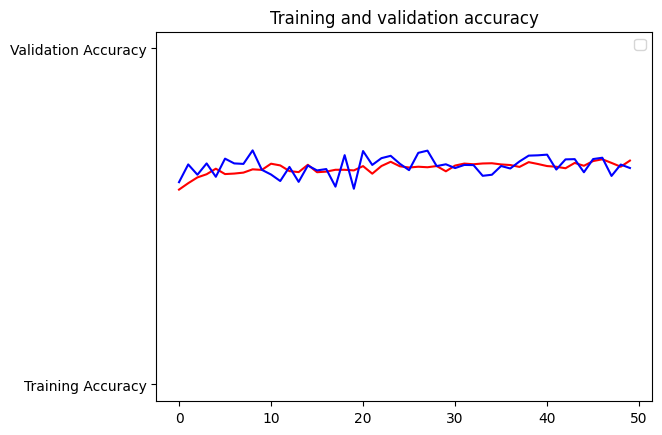

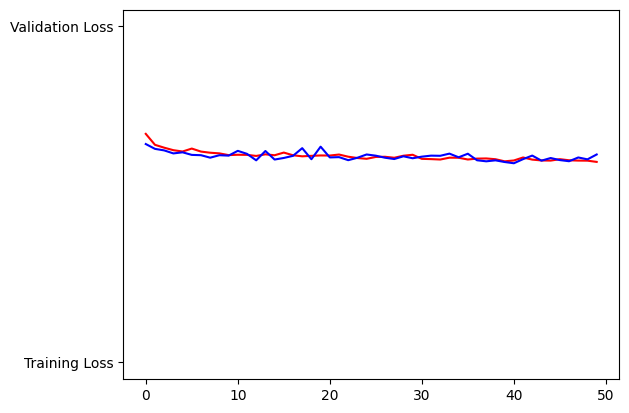

In [39]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
# rcl=history.history['recall']
# val_rcl=history.history['val_recall']

precision = history.history['precision']
val_precision = history.history['val_precision']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(precision)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, precision, 'r', "Training Accuracy")
plt.plot(epochs, val_precision, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()